## Stable Marriage
In this exercise, we will implement the stable marriage algorithm using randomly generated preference list. We will import the file matching.py as follows and use the matchmaker function. The input to this function is composed of two dictionaries. The first dictionary, called 'residentprefers', has each key corresponding to each resident and the value corresponding to the hospital preference list of the residents. The second dictionary, called 'hospitalprefers',is vice versa. For example, if there are 2 residents and 3 hospitals, then a possible input is: residentprefers = {1:[2,1,3], 2: [1,2,3]}, hospitalprefers = {1:[1,3,2], 2:[1,2,3], 3:[1,3,2]}. Note that the number of residents need not be the same as the number of hospitals. Let us now find a stable matching for this example.

In [2]:
import matching
import numpy as np

In [5]:
n1 = 10
n2 = 10

residentprefers = {1:[2,1,3], 2: [1,2,3]}
hospitalprefers = {1:[1,2], 2:[1,2], 3:[2,1]}

engaged = matching.matchmaker(residentprefers,hospitalprefers)
print(engaged)

{2: 1, 1: 2}


As we can see, the stable matching results in resident 1 paired with hospital 2, resident 2 paired with hospital 1, and hospital 3 is unpaired.

Let us now analyze the satisfaction of the matching, which will be defined as follows. Let $n_1$ and $n_2$ be the number of residents and hospitals, respectively. For a given matching, for each resident $i = 1,2,\dots, n_1$, let **$m(i)$ be the hospital that $i$ is matched to. Let $x(i)$ be the position in the preference list of resident $i$ that $m(i)$ appears in.** In the previous example, $m(1) = 2$ and $x(1) = 1$. Similarly $m(2) = 1$ and $x(2) = 1$. Similarly, for the same matching, for each hospital $j = 1,2,\dots,n_2$, let $y(j)$ be the position of hospital $j$'s matched resident in $j$'s preference list. In the example, $y(1) = 3$, $y(2) = 1$ and $y(3)$ is not defined. Using this, for a given matching, we define the average satisfaction of all the residents to be: $\sum_{i=1}^{n_1} \dfrac{x_i}{n_1^2}$. Correspondingly, the average satisfaction of all the hospitals is defined to be: $\sum_{j=1}^{n_2} \dfrac{y_j}{n_2^2}$. Note that if $y(j)$ is not defined for a certain $j$, we set $y(j) = 0$.

## Q1. Generate random instances and analyze the satsifaction of the matching

First, write a function that takes the preference lists and the matching as inputs and returns the satisfaction values.

In [12]:
def satisfaction(residentprefers, hospitalprefers, engaged):
    
    #------------ Your code here ----------- #  

    x = []
    y = []
    
    for resident, hospital in residentprefers.items():
        if resident in engaged.values():
            # return xi
            x.append(hospital.index([k for k, v in engaged.items() if v == resident][0]) + 1)
        else:
            x.append(0)
    
    for hospital, resident in hospitalprefers.items():
        if hospital in engaged:
            # return yi
            y.append(resident.index(engaged[hospital]) + 1)
        else:
            y.append(0)
    
    return (x, y)
    
    #---------------------------------- #
print(satisfaction(residentprefers, hospitalprefers, engaged))

([1, 1], [2, 1, 0])


Next, write a function that takes as inputs $n_1$ and $n_2$ and returns a random permutation of preference lists for residents and hospitals. You may use the np.random.permutation() function.

In [20]:
def generate_random_instance(n1, n2):
    
#------------- your code here -----------#

    residentprefers = dict()
    hospitalprefers = dict()
    
    # for residents
    for i in np.arange(1, n1 + 1):
        residentprefers[i] = list(np.random.permutation(n2) + 1)
    
    # for hospitals
    for i in np.arange(1, n2 + 1):
        hospitalprefers[i] = list(np.random.permutation(n1) + 1)
    
    return (residentprefers, hospitalprefers)
    
#------------- your code here -----------#
print(generate_random_instance(3,3))

({1: [2, 3, 1], 2: [3, 2, 1], 3: [1, 3, 2]}, {1: [1, 3, 2], 2: [2, 3, 1], 3: [3, 2, 1]})


Now, we would like to analyze how the resident and hospital satisfactions depend on $n_1$ and $n_2$. To do this, we first set $n_1=n_2=n$ and study three different values for $n \in \{10,50,100\}$. Then, create $100$ random instances of preference lists and compute the average satisfaction values over all the instances. Plot two graphs, one for the average resident satisfaction and the other, for the average hospital satisfaction (the x-axis being $n$ in both the plots).

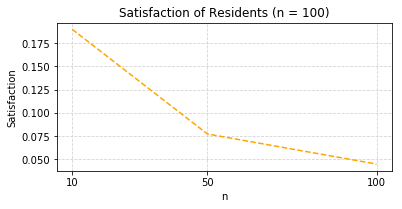

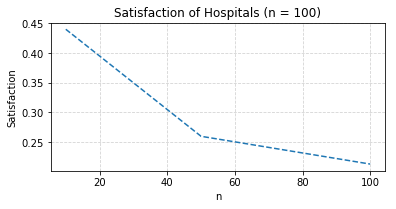

In [36]:
import matplotlib.pyplot as plt

#----------- Your code here -----------#
    
n_list = [10, 50, 100]
satis_r_list = []
satis_h_list = []
    
for n in n_list:
    residentprefers, hospitalprefers = generate_random_instance(n, n)
    engaged = matching.matchmaker(residentprefers, hospitalprefers) 
    satis_r, satis_h = satisfaction(residentprefers, hospitalprefers, engaged)
    satis_r_list.append(np.array(satis_r).sum() / (n ** 2))
    satis_h_list.append(np.array(satis_h).sum() / (n ** 2))
    
fig, ax = plt.subplots(figsize = (6, 6))
plt.subplot(211)
plt.plot(n_list, satis_r_list, '--', color = "orange")
plt.title('Satisfaction of Residents (n = %i)'%n)
plt.xticks([10, 50, 100])
plt.xlabel('n')
plt.ylabel('Satisfaction')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()
    
fig, ax = plt.subplots(figsize = (6, 6))
plt.subplot(212)
plt.plot(n_list, satis_h_list, '--')
plt.title('Satisfaction of Hospitals (n = %i)'%n)

plt.xlabel('n')
plt.ylabel('Satisfaction')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()
    
#--------------------------------------#


## Q2. Generate and analyze satisfactions for different $n_1$ and $n_2$

Now, we set $n_1 = n$ and $n_2 = n+1$ and repeat Q1 (plot $3$ pairs of graphs for $n \in \{10,50,100\}$).

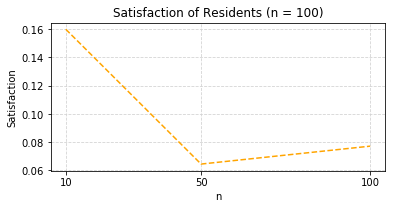

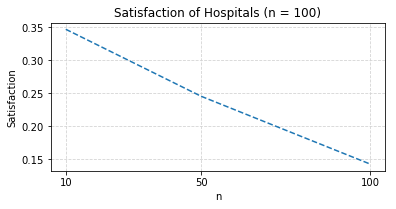

In [35]:
#----------- Your code here -----------#
    
n1_list = [10, 50, 100]
n2_list = [n + 1 for n in n1_list]
satis_r_list = []
satis_h_list = []
    
for i in range(len(n1_list)):
    residentprefers, hospitalprefers = generate_random_instance(n1_list[i], n2_list[i])
    engaged = matching.matchmaker(residentprefers, hospitalprefers) 
    satis_r, satis_h = satisfaction(residentprefers, hospitalprefers, engaged)
    satis_r_list.append(np.array(satis_r).sum() / (n1_list[i] ** 2))
    satis_h_list.append(np.array(satis_h).sum() / (n2_list[i] ** 2))
    
fig, ax = plt.subplots(figsize = (6, 6))
plt.subplot(211)
plt.plot(n_list, satis_r_list, '--', color = "orange")
plt.title('Satisfaction of Residents (n = %i)'%n)
plt.xticks([10, 50, 100])
plt.xlabel('n')
plt.ylabel('Satisfaction')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()
    
fig, ax = plt.subplots(figsize = (6, 6))
plt.subplot(212)
plt.plot(n_list, satis_h_list, '--')
plt.title('Satisfaction of Hospitals (n = %i)'%n)
plt.xticks([10, 50, 100])
plt.xlabel('n')
plt.ylabel('Satisfaction')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()
    
#--------------------------------------#

Now, we set $n_1 = n$ and $n_2 \in n+2$ and repeat Q1 (plot $3$ pairs of graphs for $n \in \{10,50,100\}$).

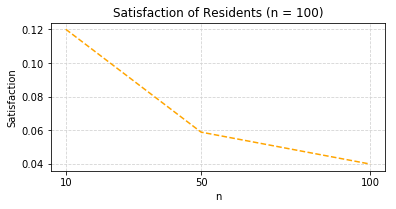

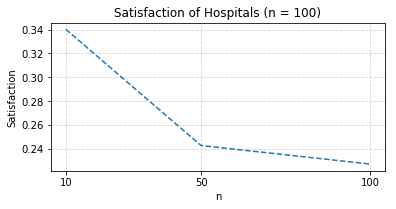

In [34]:
#----------- Your code here -----------#
    
n1_list = [10, 50, 100]
n2_list = [n + 2 for n in n1_list]
satis_r_list = []
satis_h_list = []
    
for i in range(len(n1_list)):
    residentprefers, hospitalprefers = generate_random_instance(n1_list[i], n2_list[i])
    engaged = matching.matchmaker(residentprefers, hospitalprefers) 
    satis_r, satis_h = satisfaction(residentprefers, hospitalprefers, engaged)
    satis_r_list.append(np.array(satis_r).sum() / (n1_list[i] ** 2))
    satis_h_list.append(np.array(satis_h).sum() / (n2_list[i] ** 2))
    
fig, ax = plt.subplots(figsize = (6, 6))
plt.subplot(211)
plt.plot(n_list, satis_r_list, '--', color = "orange")
plt.title('Satisfaction of Residents (n = %i)'%n)
plt.xticks([10, 50, 100])
plt.xlabel('n')
plt.ylabel('Satisfaction')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()
    
fig, ax = plt.subplots(figsize = (6, 6))
plt.subplot(212)
plt.plot(n_list, satis_h_list, '--')
plt.title('Satisfaction of Hospitals (n = %i)'%n)
plt.xticks([10, 50, 100])
plt.xlabel('n')
plt.ylabel('Satisfaction')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()
    
#--------------------------------------#

Now, we set $n_1 = n$ and $n_2 \in 2n$ and repeat Q1 (plot $3$ pairs of graphs for $n \in \{10,50,100\}$).

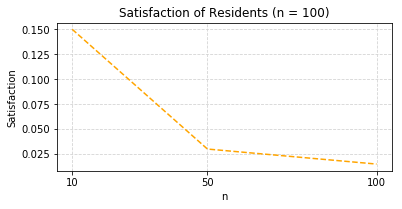

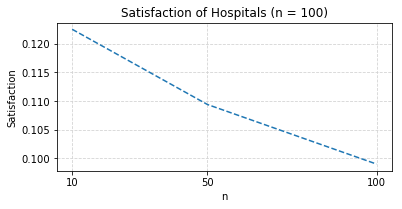

In [33]:
#----------- Your code here -----------#
    
n1_list = [10, 50, 100]
n2_list = [2 * n for n in n1_list]
satis_r_list = []
satis_h_list = []
    
for i in range(len(n1_list)):
    residentprefers, hospitalprefers = generate_random_instance(n1_list[i], n2_list[i])
    engaged = matching.matchmaker(residentprefers, hospitalprefers) 
    satis_r, satis_h = satisfaction(residentprefers, hospitalprefers, engaged)
    satis_r_list.append(np.array(satis_r).sum() / (n1_list[i] ** 2))
    satis_h_list.append(np.array(satis_h).sum() / (n2_list[i] ** 2))
    
fig, ax = plt.subplots(figsize = (6, 6))
plt.subplot(211)
plt.plot(n_list, satis_r_list, '--', color = "orange")
plt.title('Satisfaction of Residents (n = %i)'%n)
plt.xticks([10, 50, 100])
plt.xlabel('n')
plt.ylabel('Satisfaction')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()
    
fig, ax = plt.subplots(figsize = (6, 6))
plt.subplot(212)
plt.plot(n_list, satis_h_list, '--')
plt.title('Satisfaction of Hospitals (n = %i)'%n)
plt.xticks([10, 50, 100])
plt.xlabel('n')
plt.ylabel('Satisfaction')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()
    
#--------------------------------------#